In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
data = pd.read_excel("predictiondata.xlsx", sheet_name="vw_churn_data")

In [3]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [7]:
data = data.drop(columns=["Customer_ID", "Churn_Category", "Churn_Reason"], axis=1)

In [9]:
columns_to_encode = ["Gender", "Married", "State", "Value_Deal", "Phone_Service", "Multiple_Lines",
                     "Internet_Service", "Internet_Type", "Online_Security", "Online_Backup",
                     "Device_Protection_Plan", "Premium_Support", "Streaming_TV", "Unlimited_Data",
                     "Contract", "Paperless_Billing", "Payment_Method"]

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])



In [11]:
data["Customer_Status"] = data["Customer_Status"].map({"Stayed": 0, "Churned": 1})

In [13]:
X = data.drop("Customer_Status", axis=1)
y = data["Customer_Status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Encode 'Streaming_Movies'
le_movies = LabelEncoder()
X_train['Streaming_Movies'] = le_movies.fit_transform(X_train['Streaming_Movies'])
X_test['Streaming_Movies'] = le_movies.transform(X_test['Streaming_Movies'])

# Encode 'Streaming_Music'
le_music = LabelEncoder()
X_train['Streaming_Music'] = le_music.fit_transform(X_train['Streaming_Music'])
X_test['Streaming_Music'] = le_music.transform(X_test['Streaming_Music'])

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred = rf_model.predict(X_test)

In [21]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [23]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

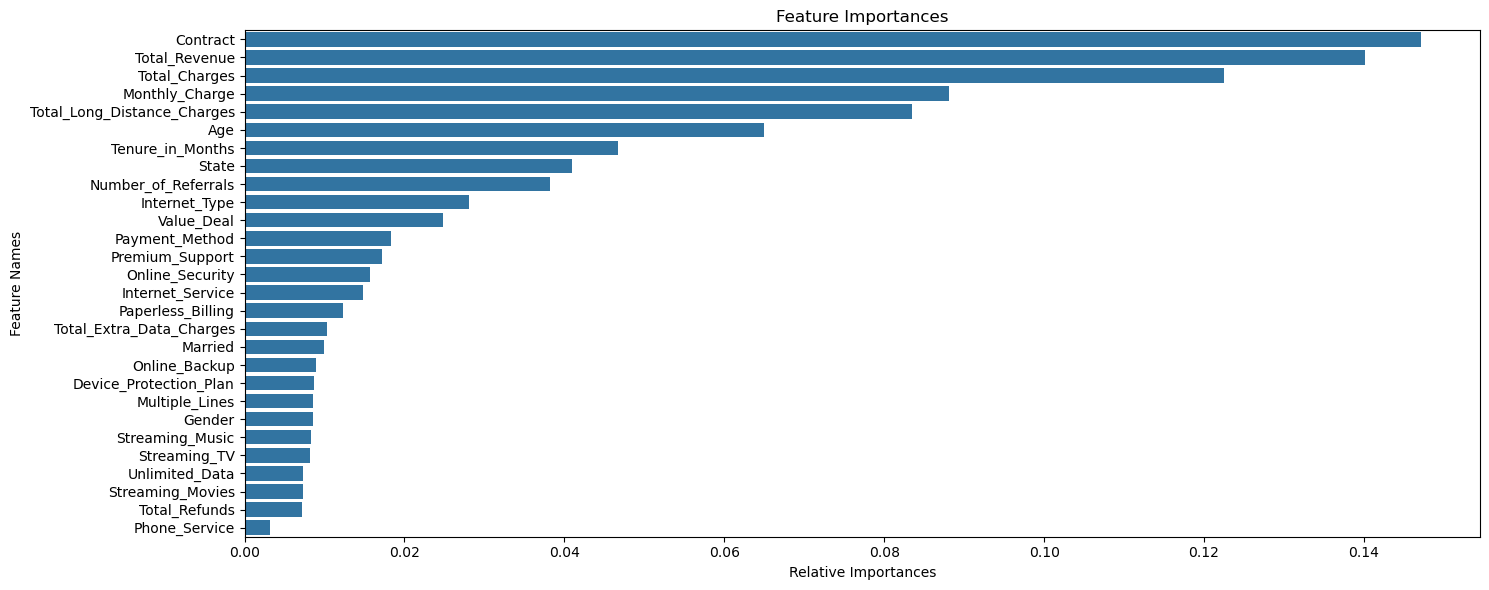

In [25]:
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances")
plt.xlabel("Relative Importances")
plt.ylabel("Feature Names")
plt.tight_layout()
plt.show()

In [27]:
data2 = pd.read_excel("predictiondata.xlsx", sheet_name="vw_join_data")

In [29]:
data2.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others


In [31]:
original_data2 = data2.copy()

In [33]:
customer_ids = data2["Customer_ID"]

In [35]:
data2 = data2.drop(["Customer_ID","Customer_Status", "Churn_Category", "Churn_Reason"], axis = 1)

In [47]:
# Strip strings
data2 = data2.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# Encode object columns using existing label_encoders
for column in data2.select_dtypes(include=["object"]).columns:
    if column in label_encoders:
        data2[column] = data2[column].fillna(label_encoders[column].classes_[0])
        data2[column] = label_encoders[column].transform(data2[column])
    else:
        print(f"⚠️ Skipping '{column}' — encoder not found")

if data2["Streaming_Movies"].dtype == "object":
    data2["Streaming_Movies"] = data2["Streaming_Movies"].fillna(le_movies.classes_[0])
    data2["Streaming_Movies"] = le_movies.transform(data2["Streaming_Movies"])

if data2["Streaming_Music"].dtype == "object":
    data2["Streaming_Music"] = data2["Streaming_Music"].fillna(le_music.classes_[0])
    data2["Streaming_Music"] = le_music.transform(data2["Streaming_Music"])


In [49]:
new_predictions = rf_model.predict(data2)

In [51]:
original_data2["Customer_Status_Predicted"] = new_predictions

In [53]:
original_data2 = original_data2[original_data2["Customer_Status_Predicted"] == 1]

In [64]:
import csv
original_data2.to_csv("your_file.csv", index=False, sep="\t", quoting=csv.QUOTE_ALL)
print("done")

done
